# Import/examine CrossCheck dataset

In [1]:
import sys
# Make imports work
sys.path.insert(0, '../')

In [63]:
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from mhealth_anomaly_detection import plots
from mhealth_anomaly_detection import format_axis as fa
from mhealth_anomaly_detection import datasets
from mhealth_anomaly_detection import anomaly_detection as ad 
from mhealth_anomaly_detection import load_refs as lr

In [ ]:
importlib.reload(datasets)

crosscheck = datasets.CrossCheck()
crosscheck.data

,study_id,eureka_id,day,act_in_vehicle_ep_0,act_in_vehicle_ep_1,act_in_vehicle_ep_2,act_in_vehicle_ep_3,act_in_vehicle_ep_4,act_on_bike_ep_0,act_on_bike_ep_1,...,unlock_duration_ep_4,unlock_num_ep_0,unlock_num_ep_1,unlock_num_ep_2,unlock_num_ep_3,unlock_num_ep_4,date,subject_id,first_day,study_day
0,84,u005,20150121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0,0,0,0,0,2015-01-21,84,2015-01-21,0
1,84,u005,20150122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0,0,0,0,0,2015-01-22,84,2015-01-21,1
2,84,u005,20150123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0,0,0,0,0,2015-01-23,84,2015-01-21,2
3,84,u005,20150124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0,0,0,0,0,2015-01-24,84,2015-01-21,3
4,84,u005,20150125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000,0,0,0,0,0,2015-01-25,84,2015-01-21,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22074,91,u090,20170716,31245.0,9624.0,9873.0,3807.0,7941.0,64.0,39.0,...,18096.373,168,88,29,29,23,2017-07-16,91,2016-06-09,402
22075,91,u090,20170717,32104.0,8732.0,8892.0,3803.0,10677.0,124.0,61.0,...,20067.260,172,90,22,23,39,2017-07-17,91,2016-06-09,403
22076,91,u090,20170718,15992.0,8391.0,368.0,0.0,7233.0,16.0,0.0,...,14317.830,180,49,21,12,98,2017-07-18,91,2016-06-09,404
22077,91,u090,20170719,38259.0,12389.0,10891.0,6410.0,8569.0,70.0,15.0,...,18685.950,221,86,41,33,63,2017-07-19,91,2016-06-09,405


<AxesSubplot: xlabel='date', ylabel='study_id'>

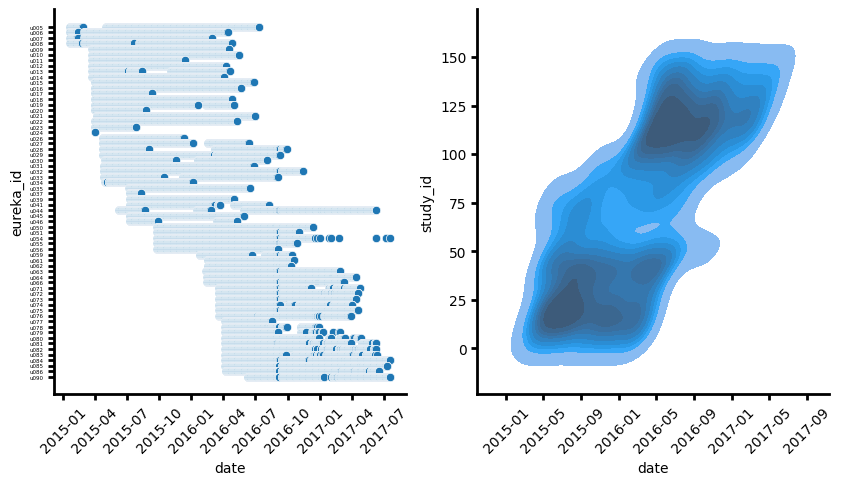

In [51]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5))
sns.scatterplot(
    y='eureka_id',
    x='date',
    data=crosscheck.data,
    ax=axes[0]
)
fa.despine_thicken_axes(axes[0], fontsize=10, y_tick_fontsize=4, x_rotation=45)

sns.kdeplot(
    y='study_id',
    x='date',
    data=crosscheck.data,
    ax=axes[1],
    fill=True
)
fa.despine_thicken_axes(axes[1], fontsize=10, x_rotation=45)


In [52]:
daily_passive_features = [
    'act_in_vehicle_ep_0',
    'act_on_bike_ep_0',
    'act_on_foot_ep_0',
    'act_still_ep_0',
    'act_tilting_ep_0',
    'act_unknown_ep_0',
    'audio_amp_mean_ep_0',
    'audio_convo_duration_ep_0',
    'audio_convo_num_ep_0',
    'audio_voice_ep_0',
    'call_in_duration_ep_0',
    'call_in_num_ep_0',
    'call_miss_num_ep_0',
    'call_out_duration_ep_0',
    'call_out_num_ep_0',
    'light_mean_ep_0',
    'light_mean_ep_1',
    'light_mean_ep_4',
    'light_std_ep_0',
    'loc_dist_ep_0',
    'loc_visit_num_ep_0',
    'sms_in_num_ep_0',
    'sms_out_num_ep_0',
    'unlock_duration_ep_0',
    'unlock_num_ep_0'
]

  0%|          | 0/61 [00:01<?, ?it/s]


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

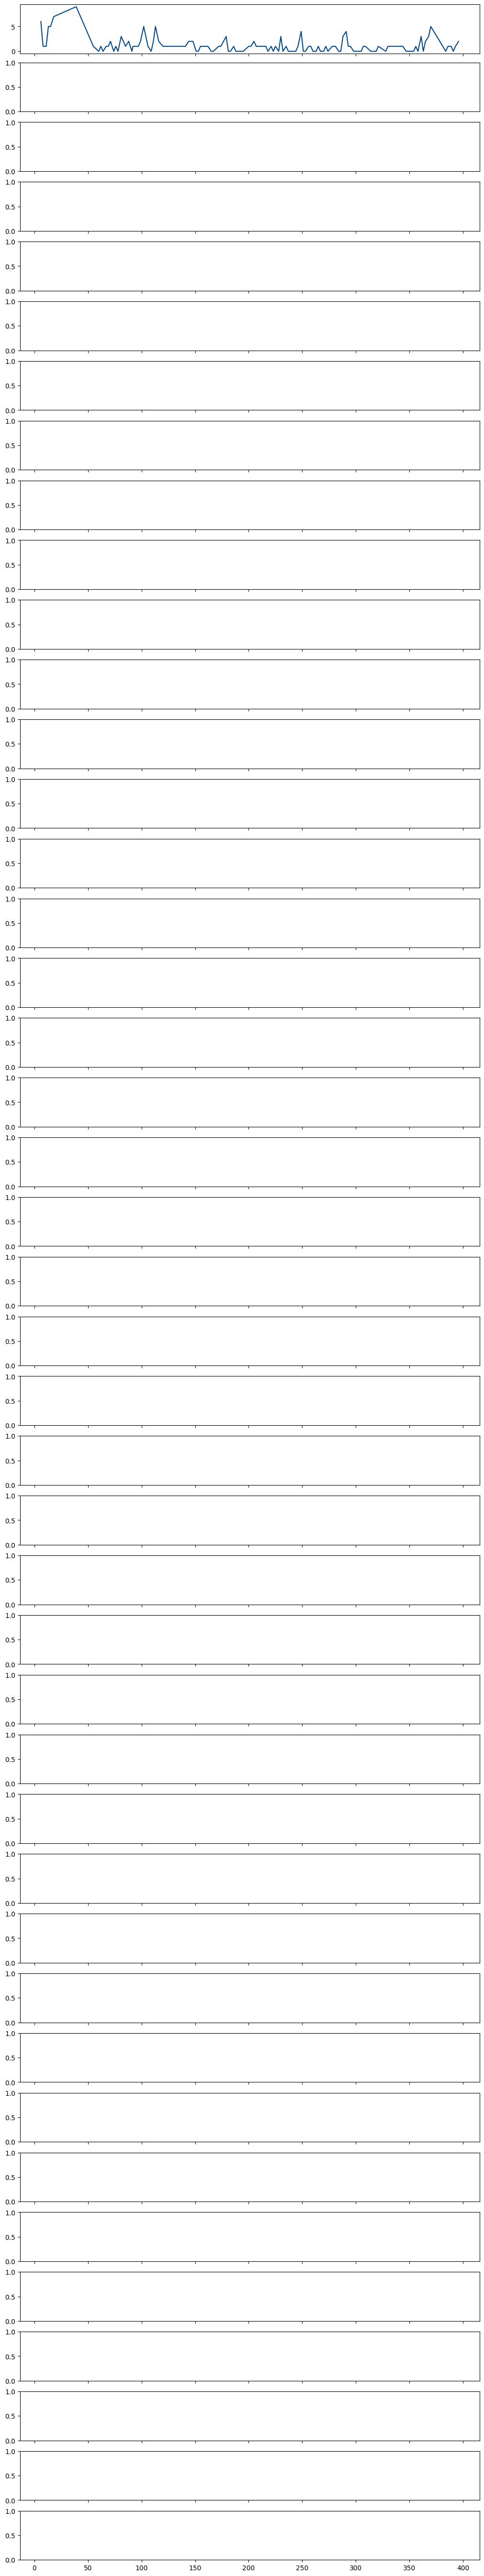

In [66]:
from pathlib import Path
from tqdm.auto import tqdm
importlib.reload(plots)

#daily_passive_features = [c for c in crosscheck.feature_cols if c[-2:] == '_0']
plot_features = [
    'ema_neg_score',
    'ema_VOICES',
    'ema_SEEING_THINGS',
    'ema_STRESSED',
    'ema_DEPRESSED',
    'ema_HARM',
    'ema_pos_score',
    'ema_HOPEFUL',
    'ema_CALM',
    'ema_SLEEPING',
    'ema_SOCIAL',
    'ema_THINK',
    'sleep_duration',
    'quality_activity',
    'quality_audio',
    'quality_gps_on',
    'quality_light',
    'quality_loc',
    *daily_passive_features
]

fig_dir = Path('output', 'crosscheck', 'lineplot')
fig_dir.mkdir(
    parents=True,
    exist_ok=True
)
palette = lr.get_colors('../lib/colors.json')

# Plot the data for each subject
for sid, subject_data in tqdm(crosscheck.data.groupby('subject_id')):
    fig, axes = plots.lineplot_features(
        subject_data.drop(['date', 'first_day'], axis=1),
        plot_features,
        scatter=True,
        palette=palette
    )
    fig.suptitle(f'Subject {sid}')
    fname = Path(fig_dir, f'{sid}_lineplot.png')
    fig.savefig(fname)
    plt.close()
    break

In [15]:
palette['features']

{'active_energy_burned': '#228833',
 'total_sleep_time': '#AA3377',
 'hrv_mean': '#663333',
 'hr_resting': '#BB5566',
 'mesor': '#BB5566',
 'amplitude': '#BB5566',
 'acrophase': '#BB5566',
 'period': '#BB5566',
 'cost': '#BB5566',
 'n': '#BB5566',
 'hours_with_data': '#555555',
 'ema_sad_choices': '#004488',
 'total_re': 'gray',
 'act_in_vehicle_ep_0': '#228833',
 'act_in_vehicle_ep_1': '#228833',
 'act_in_vehicle_ep_2': '#228833',
 'act_in_vehicle_ep_3': '#228833',
 'act_in_vehicle_ep_4': '#228833',
 'act_on_bike_ep_0': '#228833',
 'act_on_bike_ep_1': '#228833',
 'act_on_bike_ep_2': '#228833',
 'act_on_bike_ep_3': '#228833',
 'act_on_bike_ep_4': '#228833',
 'act_on_foot_ep_0': '#228833',
 'act_on_foot_ep_1': '#228833',
 'act_on_foot_ep_2': '#228833',
 'act_on_foot_ep_3': '#228833',
 'act_on_foot_ep_4': '#228833',
 'act_running_ep_0': '#228833',
 'act_running_ep_1': '#228833',
 'act_running_ep_2': '#228833',
 'act_running_ep_3': '#228833',
 'act_running_ep_4': '#228833',
 'act_still_ep

In [ ]:
for f in crosscheck.feature_cols:
    if f.startswith('ema_'):
        print(
            '"' + f + '": "#004488",',
        )
    elif f.startswith('act_'):
        print(
            '"' + f + '": "#228833",',
        )
    elif f.startswith('sleep_'):
        print(
            '"' + f + '": "#AA3377",',
        )
    elif f.startswith('light_'):
        print(
            '"' + f + '": "#DDAA33",',
        )
    elif f.startswith('audio_'):
        print(
            '"' + f + '": "#88CCEE",',
        )
    elif f.startswith('call_'):
        print(
            '"' + f + '": "#44AA99",',
        )
    elif f.startswith('loc_'):
        print(
            '"' + f + '": "#555555",',
        )
    else:
        print(
            '"' + f + '": "gray",',
        )


"act_in_vehicle_ep_0": "#228833",
"act_in_vehicle_ep_1": "#228833",
"act_in_vehicle_ep_2": "#228833",
"act_in_vehicle_ep_3": "#228833",
"act_in_vehicle_ep_4": "#228833",
"act_on_bike_ep_0": "#228833",
"act_on_bike_ep_1": "#228833",
"act_on_bike_ep_2": "#228833",
"act_on_bike_ep_3": "#228833",
"act_on_bike_ep_4": "#228833",
"act_on_foot_ep_0": "#228833",
"act_on_foot_ep_1": "#228833",
"act_on_foot_ep_2": "#228833",
"act_on_foot_ep_3": "#228833",
"act_on_foot_ep_4": "#228833",
"act_running_ep_0": "#228833",
"act_running_ep_1": "#228833",
"act_running_ep_2": "#228833",
"act_running_ep_3": "#228833",
"act_running_ep_4": "#228833",
"act_still_ep_0": "#228833",
"act_still_ep_1": "#228833",
"act_still_ep_2": "#228833",
"act_still_ep_3": "#228833",
"act_still_ep_4": "#228833",
"act_tilting_ep_0": "#228833",
"act_tilting_ep_1": "#228833",
"act_tilting_ep_2": "#228833",
"act_tilting_ep_3": "#228833",
"act_tilting_ep_4": "#228833",
"act_unknown_ep_0": "#228833",
"act_unknown_ep_1": "#228833",
"ac

In [ ]:
subject_id = 84
subject_data = crosscheck.data[crosscheck.data.subject_id == 84]

# Rolling 7 day PCA based anomaly detection
anomalyDetector = ad.BaseRollingAnomalyDetector(
    features=crosscheck.behavior_cols,
    window_size=7
)

# Get reconstruction error and use to do anomaly labeling
reconstruction_error, pca_components = anomalyDetector.getReconstructionError(subject_data)
subject_data['anomaly'] = anomalyDetector.labelAnomaly(reconstruction_error)
subject_data['total_re'] = reconstruction_error['total_re']

# Plot features with anomalies labeled
plots.lineplot_features(
    subject_data,
    [
        'total_re',
        *plot_features
    ],
    anomaly_col='anomaly'
);

/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Users/akre96/Library/Caches/pypoetry/virtualenvs/mhealth-anomaly-detection-Qbd7iEZF-py3.10/lib/python3.10/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


ValueError: Input X contains NaN.
PCA does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values